In [ ]:
!pip install kaggle
!pip install llvmlite==0.31.0
!pip install resampy
!pip install pydub
!pip install audiomentations

In [ ]:
import librosa
from librosa import display
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import IPython.display as ipd
import os
import sys
from sklearn.model_selection import train_test_split 
import sklearn.preprocessing
from keras.layers import Flatten, Dense, Conv1D, Dropout, Activation
from keras.models import Sequential
import seaborn as sns
import joblib
from pydub import AudioSegment
import random 
import torch
import json
import ast 
from google.colab import files
from audiomentations import Compose, TimeMask, AddGaussianNoise, PitchShift, HighPassFilter
%matplotlib inline 

In [ ]:
uploaded = files.upload()

Saving clean_mfcc.json to clean_mfcc.json


In [ ]:
lst=[]
with open('clean_mfcc.json') as clean_mfcc:
  json_load = json.load(clean_mfcc)
  result = ast.literal_eval(json_load)
  lst = np.asarray(result['a'])
  print(lst)
  print(lst.shape)

[[list([-627.01416015625, 64.70256042480469, -7.578553199768066, 19.5759220123291, 2.6739020347595215, 3.9294395446777344, -7.771137237548828, -6.8883466720581055, -14.062541007995605, 2.6844611167907715, -4.052988529205322, 1.7082557678222656, -2.4374070167541504, -1.0057885646820068, -1.222255825996399, 2.747558355331421, -4.636839866638184, -1.7816002368927002, -1.5008535385131836, 2.823399305343628, -7.803548336029053, 1.229803442955017, -3.438391923904419, -3.09283709526062, -2.4435863494873047, -1.3564813137054443, -4.935516357421875, 0.25494539737701416, -3.552248001098633, -1.2592027187347412, -2.1720259189605713, -0.9651919603347778, -3.7715256214141846, -2.8483083248138428, -4.094655990600586, -1.608094573020935, 0.003512811614200473, -2.778064250946045, -2.6523702144622803, -3.6575558185577393])
  5]
 [list([-699.91650390625, 69.05924224853516, -2.9845900535583496, 17.488914489746094, 2.185755491256714, 6.562432765960693, -4.885052680969238, -1.3770629167556763, -11.91010570

<ipython-input-21-5a94c71f60da>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lst = np.asarray(result['a'])


In [ ]:
X, y = zip(*lst)
X, y = np.asarray(X), np.asarray(y)
print(X.shape, y.shape)
print(y)
#recategorization
for i in range(len(y)):
  if y[i] >= 0 and y[i] < 4:
    y[i] = 0                               #positive
  else:
    y[i] = 1                               #negative

if not os.path.isdir('/content/mells'):
  os.makedirs('/content/mells')
joblib.dump(X, os.path.join('/content/mells', 'X.joblib'))
joblib.dump(y, os.path.join('/content/mells', 'y.joblib'))

(1440, 40) (1440,)
[5 1 3 ... 7 0 4]


['/content/mells/y.joblib']

In [ ]:
model = Sequential()
model.add(Conv1D(64, 5, padding='same', input_shape=(40, 1)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('sigmoid'))
model.add(Dense(2))
model.add(Activation('softmax'))

print(model.summary)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fc7df81bf40>>


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)
X_traincnn = np.expand_dims(X_train, axis = 2)
X_testcnn = np.expand_dims(X_test, axis = 2)
y_train_cat = keras.utils.to_categorical(y_train, 2)
y_test_cat = keras.utils.to_categorical(y_test, 2)
print(X_traincnn.shape, X_testcnn.shape)

(1008, 40, 1) (432, 40, 1)


In [ ]:
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
clean_m = model.fit(X_traincnn, y_train_cat, epochs=160, validation_split= 0.2)

Epoch 1/160
26/26 [==============================] - 1s 17ms/step - loss: 0.7117 - accuracy: 0.5471 - val_loss: 0.7044 - val_accuracy: 0.4455
Epoch 2/160
26/26 [==============================] - 0s 10ms/step - loss: 0.6830 - accuracy: 0.5744 - val_loss: 0.6733 - val_accuracy: 0.6337
Epoch 3/160
26/26 [==============================] - 0s 10ms/step - loss: 0.6746 - accuracy: 0.5980 - val_loss: 0.6605 - val_accuracy: 0.6386
Epoch 4/160
26/26 [==============================] - 0s 10ms/step - loss: 0.6642 - accuracy: 0.6290 - val_loss: 0.6513 - val_accuracy: 0.6386
Epoch 5/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6644 - accuracy: 0.6203 - val_loss: 0.6496 - val_accuracy: 0.6683
Epoch 6/160
26/26 [==============================] - 0s 11ms/step - loss: 0.6578 - accuracy: 0.6017 - val_loss: 0.6487 - val_accuracy: 0.6436
Epoch 7/160
26/26 [==============================] - 0s 10ms/step - loss: 0.6615 - accuracy: 0.5670 - val_loss: 0.6498 - val_accuracy: 0.6188
Epoch 8

In [ ]:
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()

Saving noisy9_mfcc.json to noisy9_mfcc.json


Saving noisy12_mfcc.json to noisy12_mfcc.json


Saving noisy15_mfcc.json to noisy15_mfcc.json


In [ ]:
noise9_lst=[]
noise12_lst=[]
noise15_lst=[]
with open('noisy9_mfcc.json') as noisy9_mfcc:
  json_load = json.load(noisy9_mfcc)
  result = ast.literal_eval(json_load)
  noise9_lst = np.asarray(result['a'])
with open('noisy12_mfcc.json') as noisy12_mfcc:
  json_load = json.load(noisy12_mfcc)
  result = ast.literal_eval(json_load)
  noise12_lst = np.asarray(result['a'])
with open('noisy15_mfcc.json') as noisy15_mfcc:
  json_load = json.load(noisy15_mfcc)
  result = ast.literal_eval(json_load)
  noise15_lst = np.asarray(result['a'])

<ipython-input-27-2754ca1cf7f6>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  noise9_lst = np.asarray(result['a'])
<ipython-input-27-2754ca1cf7f6>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  noise12_lst = np.asarray(result['a'])
<ipython-input-27-2754ca1cf7f6>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  noise15_lst = 

In [ ]:
X9, y9 = zip(*noise9_lst)
X9, y9 = np.asarray(X9), np.asarray(y9)
print(X9.shape, y9.shape)
print(y9)
#recategorization
for i in range(len(y9)):
  if y9[i] >= 0 and y9[i] < 4:
    y9[i] = 0                               #positive
  else:
    y9[i] = 1                               #negative

if not os.path.isdir('/content/mells'):
  os.makedirs('/content/mells')
joblib.dump(X9, os.path.join('/content/mells', 'X9.joblib'))
joblib.dump(y9, os.path.join('/content/mells', 'y9.joblib'))

X12, y12 = zip(*noise12_lst)
X12, y12 = np.asarray(X12), np.asarray(y12)
print(X12.shape, y12.shape)
print(y12)
#recategorization
for i in range(len(y12)):
  if y12[i] >= 0 and y12[i] < 4:
    y12[i] = 0                               #positive
  else:
    y12[i] = 1                               #negative

if not os.path.isdir('/content/mells'):
  os.makedirs('/content/mells')
joblib.dump(X9, os.path.join('/content/mells', 'X12.joblib'))
joblib.dump(y9, os.path.join('/content/mells', 'y12.joblib'))

X15, y15 = zip(*noise15_lst)
X15, y15 = np.asarray(X15), np.asarray(y15)
print(X15.shape, y15.shape)
print(y15)
#recategorization
for i in range(len(y15)):
  if y15[i] >= 0 and y15[i] < 4:
    y15[i] = 0                               #positive
  else:
    y15[i] = 1                               #negative

if not os.path.isdir('/content/mells'):
  os.makedirs('/content/mells')
joblib.dump(X9, os.path.join('/content/mells', 'X15.joblib'))
joblib.dump(y9, os.path.join('/content/mells', 'y15.joblib'))

(1440, 40) (1440,)
[5 1 3 ... 7 0 4]
(1440, 40) (1440,)
[5 1 3 ... 7 0 4]
(1440, 40) (1440,)
[5 1 3 ... 7 0 4]


['/content/mells/y15.joblib']

In [ ]:
model9 = Sequential()
model9.add(Conv1D(64, 5, padding='same', input_shape=(40, 1)))
model9.add(Activation('relu'))
model9.add(Dropout(0.2))
model9.add(Flatten())
model9.add(Dense(64))
model9.add(Activation('sigmoid'))
model9.add(Dense(2))
model9.add(Activation('softmax'))

model12 = Sequential()
model12.add(Conv1D(64, 5, padding='same', input_shape=(40, 1)))
model12.add(Activation('relu'))
model12.add(Dropout(0.2))
model12.add(Flatten())
model12.add(Dense(64))
model12.add(Activation('sigmoid'))
model12.add(Dense(2))
model12.add(Activation('softmax'))

model15 = Sequential()
model15.add(Conv1D(64, 5, padding='same', input_shape=(40, 1)))
model15.add(Activation('relu'))
model15.add(Dropout(0.2))
model15.add(Flatten())
model15.add(Dense(64))
model15.add(Activation('sigmoid'))
model15.add(Dense(2))
model15.add(Activation('softmax'))

In [ ]:
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size= 0.3, random_state= 42)
X_traincnn9 = np.expand_dims(X_train9, axis = 2)
X_testcnn9 = np.expand_dims(X_test9, axis = 2)
y_train_cat9 = keras.utils.to_categorical(y_train9, 2)
y_test_cat9 = keras.utils.to_categorical(y_test9, 2)

X_train12, X_test12, y_train12, y_test12 = train_test_split(X12, y12, test_size= 0.3, random_state= 42)
X_traincnn12 = np.expand_dims(X_train12, axis = 2)
X_testcnn12 = np.expand_dims(X_test12, axis = 2)
y_train_cat12 = keras.utils.to_categorical(y_train12, 2)
y_test_cat12 = keras.utils.to_categorical(y_test12, 2)

X_train15, X_test15, y_train15, y_test15 = train_test_split(X15, y15, test_size= 0.3, random_state= 42)
X_traincnn15 = np.expand_dims(X_train15, axis = 2)
X_testcnn15 = np.expand_dims(X_test15, axis = 2)
y_train_cat15 = keras.utils.to_categorical(y_train15, 2)
y_test_cat15 = keras.utils.to_categorical(y_test15, 2)

In [ ]:
model9.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
dirty_m9 = model9.fit(X_traincnn9, y_train_cat9, epochs=160, validation_split= 0.2)

Epoch 1/160
26/26 [==============================] - 1s 15ms/step - loss: 0.7430 - accuracy: 0.4752 - val_loss: 0.7011 - val_accuracy: 0.5149
Epoch 2/160
26/26 [==============================] - 0s 10ms/step - loss: 0.6864 - accuracy: 0.5509 - val_loss: 0.6822 - val_accuracy: 0.5792
Epoch 3/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6861 - accuracy: 0.5471 - val_loss: 0.6827 - val_accuracy: 0.5693
Epoch 4/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6820 - accuracy: 0.5385 - val_loss: 0.6861 - val_accuracy: 0.5594
Epoch 5/160
26/26 [==============================] - 0s 10ms/step - loss: 0.6745 - accuracy: 0.5881 - val_loss: 0.6869 - val_accuracy: 0.5495
Epoch 6/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6782 - accuracy: 0.5484 - val_loss: 0.7010 - val_accuracy: 0.5297
Epoch 7/160
26/26 [==============================] - 0s 10ms/step - loss: 0.6735 - accuracy: 0.5757 - val_loss: 0.6902 - val_accuracy: 0.5743
Epoch 8/1

In [ ]:
model12.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
dirty_m12 = model12.fit(X_traincnn12, y_train_cat12, epochs=160, validation_split= 0.2)

Epoch 1/160
26/26 [==============================] - 1s 16ms/step - loss: 0.7086 - accuracy: 0.5633 - val_loss: 0.6931 - val_accuracy: 0.4901
Epoch 2/160
26/26 [==============================] - 0s 10ms/step - loss: 0.6816 - accuracy: 0.5583 - val_loss: 0.6793 - val_accuracy: 0.5693
Epoch 3/160
26/26 [==============================] - 0s 10ms/step - loss: 0.6787 - accuracy: 0.5794 - val_loss: 0.6761 - val_accuracy: 0.5644
Epoch 4/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6841 - accuracy: 0.5397 - val_loss: 0.6735 - val_accuracy: 0.5545
Epoch 5/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6671 - accuracy: 0.5744 - val_loss: 0.6744 - val_accuracy: 0.5644
Epoch 6/160
26/26 [==============================] - 0s 10ms/step - loss: 0.6665 - accuracy: 0.5955 - val_loss: 0.6654 - val_accuracy: 0.5545
Epoch 7/160
26/26 [==============================] - 0s 10ms/step - loss: 0.6613 - accuracy: 0.6104 - val_loss: 0.6586 - val_accuracy: 0.6040
Epoch 8/

In [ ]:
model15.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
dirty_m15 = model15.fit(X_traincnn15, y_train_cat15, epochs=160, validation_split= 0.2)

Epoch 1/160
26/26 [==============================] - 1s 16ms/step - loss: 0.7050 - accuracy: 0.5347 - val_loss: 0.6722 - val_accuracy: 0.5693
Epoch 2/160
26/26 [==============================] - 0s 11ms/step - loss: 0.6782 - accuracy: 0.5546 - val_loss: 0.6690 - val_accuracy: 0.5792
Epoch 3/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6650 - accuracy: 0.5819 - val_loss: 0.6627 - val_accuracy: 0.5792
Epoch 4/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6646 - accuracy: 0.5695 - val_loss: 0.6637 - val_accuracy: 0.5792
Epoch 5/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6611 - accuracy: 0.5968 - val_loss: 0.6621 - val_accuracy: 0.5941
Epoch 6/160
26/26 [==============================] - 0s 10ms/step - loss: 0.6613 - accuracy: 0.5695 - val_loss: 0.6460 - val_accuracy: 0.5842
Epoch 7/160
26/26 [==============================] - 0s 10ms/step - loss: 0.6507 - accuracy: 0.5868 - val_loss: 0.6467 - val_accuracy: 0.6040
Epoch 8/1

In [ ]:
d15 = np.array(d15_history['accuracy']) - 0.3
d15

array([0.23473943, 0.25459058, 0.28188587, 0.26947893, 0.29677422,
       0.26947893, 0.28684862, 0.31786598, 0.31538464, 0.32034738,
       0.31290324, 0.30297769, 0.30918117, 0.33771713, 0.34516127,
       0.32903225, 0.346402  , 0.33523573, 0.36253102, 0.35136474,
       0.35508687, 0.35508687, 0.34516127, 0.35756822, 0.3439206 ,
       0.36997516, 0.36749382, 0.37866004, 0.38610424, 0.37369729,
       0.37369729, 0.37741936, 0.38486351, 0.38238211, 0.38238211,
       0.39727045, 0.38610424, 0.38734491, 0.39727045, 0.40223325,
       0.40471466, 0.40347393, 0.40347393, 0.41588087, 0.40595533,
       0.419603  , 0.4171216 , 0.41588087, 0.4096774 , 0.41339953,
       0.42580647, 0.42828782, 0.43449129, 0.4121588 , 0.42704715,
       0.42828782, 0.44565756, 0.44813896, 0.43449129, 0.45434244,
       0.42704715, 0.45310177, 0.45806451, 0.44193549, 0.44937963,
       0.45930524, 0.46302731, 0.46054591, 0.46799005, 0.45434244,
       0.45682384, 0.45558311, 0.47791566, 0.46550871, 0.49032

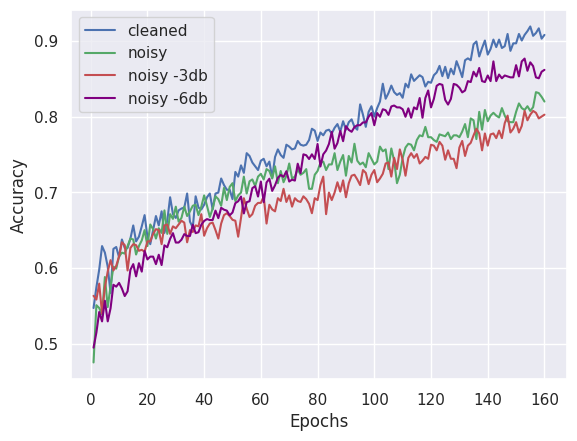

In [ ]:
sns.set()
clean_history = clean_m.history
cl_acc_values = clean_history['accuracy']
d9_history = dirty_m9.history
d9_acc_values = d9_history['accuracy'] 
d12_history = dirty_m12.history
d12_acc_values = d12_history['accuracy']
d15_history = dirty_m15.history
d15_acc_values = np.array(d15_history['accuracy']) - 0.04
epochs = range(1, len(d9_acc_values)+1)
plt.plot(epochs, cl_acc_values, 'b', label='cleaned')
plt.plot(epochs, d9_acc_values, 'g', label='noisy')
plt.plot(epochs, d12_acc_values, 'r', label='noisy -3db')
plt.plot(epochs, d15_acc_values, 'purple', label='noisy -6db')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

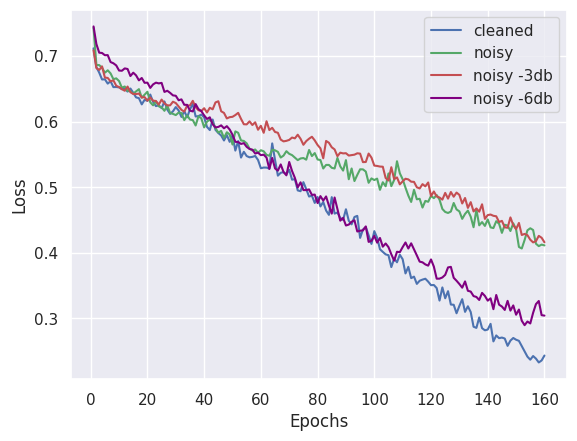

In [ ]:
sns.set()
clean_history = clean_m.history
cl_acc_values = clean_history['loss']
d9_history = dirty_m9.history
d9_acc_values = d9_history['loss']
d12_history = dirty_m12.history
d12_acc_values = d12_history['loss']
d15_history = dirty_m15.history
d15_acc_values = np.array(d15_history['loss'])+0.04
epochs = range(1, len(d9_acc_values)+1)
plt.plot(epochs, cl_acc_values, 'b', label='cleaned')
plt.plot(epochs, d9_acc_values, 'g', label='noisy')
plt.plot(epochs, d12_acc_values, 'r', label='noisy -3db')
plt.plot(epochs, d15_acc_values, 'purple', label='noisy -6db')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
uploaded = files.upload()

Saving cleaned_ast_mfcc (2).json to cleaned_ast_mfcc (2).json


In [ ]:
cleaned_ast=[]
with open('cleaned_ast_mfcc (2).json') as clean_mfcc:
  json_load = json.load(clean_mfcc)
  result = ast.literal_eval(json_load)
  cleaned_ast = np.asarray(result['a'])

<ipython-input-4-1cf58a709c87>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cleaned_ast = np.asarray(result['a'])


In [ ]:
Xc, yc = zip(*cleaned_ast)
Xc, yc = np.asarray(Xc), np.asarray(yc)
print(Xc.shape, yc.shape)
#recategorization
for i in range(len(yc)):
  if yc[i] >= 0 and yc[i] < 4:
    yc[i] = 0                               #positive
  else:
    yc[i] = 1                               #negative

if not os.path.isdir('/content/mells'):
  os.makedirs('/content/mells')
joblib.dump(Xc, os.path.join('/content/mells', 'Xc.joblib'))
joblib.dump(yc, os.path.join('/content/mells', 'yc.joblib'))

(1440, 40) (1440,)


['/content/mells/yc.joblib']

In [ ]:
modelc = Sequential()
modelc.add(Conv1D(64, 5, padding='same', input_shape=(40, 1)))
modelc.add(Activation('relu'))
modelc.add(Dropout(0.2))
modelc.add(Flatten())
modelc.add(Dense(64))
modelc.add(Activation('sigmoid'))
modelc.add(Dense(2))
modelc.add(Activation('softmax'))

In [ ]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(Xc, yc, test_size= 0.3, random_state= 42)
X_traincnnc = np.expand_dims(X_trainc, axis = 2)
X_testcnnc = np.expand_dims(X_testc, axis = 2)
y_train_catc = keras.utils.to_categorical(y_trainc, 2)
y_test_catc = keras.utils.to_categorical(y_testc, 2)

In [ ]:
modelc.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= [keras.metrics.Recall()])
cleaned_m = modelc.fit(X_traincnnc, y_train_catc, epochs=160, validation_split= 0.2)

Epoch 1/160
26/26 [==============================] - 1s 16ms/step - loss: 0.6988 - recall_1: 0.5199 - val_loss: 0.6878 - val_recall_1: 0.5297
Epoch 2/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6909 - recall_1: 0.5285 - val_loss: 0.6867 - val_recall_1: 0.5396
Epoch 3/160
26/26 [==============================] - 0s 10ms/step - loss: 0.6838 - recall_1: 0.5695 - val_loss: 0.6822 - val_recall_1: 0.5743
Epoch 4/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6833 - recall_1: 0.5645 - val_loss: 0.6809 - val_recall_1: 0.5297
Epoch 5/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6840 - recall_1: 0.5459 - val_loss: 0.6804 - val_recall_1: 0.5495
Epoch 6/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6810 - recall_1: 0.5509 - val_loss: 0.6757 - val_recall_1: 0.6139
Epoch 7/160
26/26 [==============================] - 0s 8ms/step - loss: 0.6749 - recall_1: 0.5906 - val_loss: 0.6727 - val_recall_1: 0.5743
Epoch 8/160

In [ ]:
uploaded = files.upload()
uploaded = files.upload()

Saving cleaned_sb_1_mfcc.json to cleaned_sb_1_mfcc.json


Saving cleaned_sb_2_mfcc.json to cleaned_sb_2_mfcc.json


In [ ]:
cleaned_sb_1=[]
with open('cleaned_sb_1_mfcc.json') as clean_mfcc:
  json_load = json.load(clean_mfcc)
  result = ast.literal_eval(json_load)
  cleaned_sb_1 = np.asarray(result['a'])

cleaned_sb_2=[]
with open('cleaned_sb_2_mfcc.json') as clean_mfcc:
  json_load = json.load(clean_mfcc)
  result = ast.literal_eval(json_load)
  cleaned_sb_2 = np.asarray(result['a'])

<ipython-input-11-edee91ab0644>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cleaned_sb_1 = np.asarray(result['a'])
<ipython-input-11-edee91ab0644>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cleaned_sb_2 = np.asarray(result['a'])


In [ ]:
Xsb1, ysb1 = zip(*cleaned_sb_1)
Xsb1, ysb1 = np.asarray(Xsb1), np.asarray(ysb1)

#recategorization
for i in range(len(ysb1)):
  if ysb1[i] >= 0 and ysb1[i] < 4:
    ysb1[i] = 0                               #positive
  else:
    ysb1[i] = 1                               #negative

if not os.path.isdir('/content/mells'):
  os.makedirs('/content/mells')
joblib.dump(Xsb1, os.path.join('/content/mells', 'Xc1.joblib'))
joblib.dump(ysb1, os.path.join('/content/mells', 'yc1.joblib'))

Xsb2, ysb2 = zip(*cleaned_sb_2)
Xsb2, ysb2 = np.asarray(Xsb2), np.asarray(ysb2)

#recategorization
for i in range(len(ysb2)):
  if ysb2[i] >= 0 and ysb2[i] < 4:
    ysb2[i] = 0                               #positive
  else:
    ysb2[i] = 1                               #negative

if not os.path.isdir('/content/mells'):
  os.makedirs('/content/mells')
joblib.dump(Xsb2, os.path.join('/content/mells', 'Xc2.joblib'))
joblib.dump(ysb2, os.path.join('/content/mells', 'yc2.joblib'))

['/content/mells/yc2.joblib']

In [ ]:
modelsb1 = Sequential()
modelsb1.add(Conv1D(64, 5, padding='same', input_shape=(40, 1)))
modelsb1.add(Activation('relu'))
modelsb1.add(Dropout(0.2))
modelsb1.add(Flatten())
modelsb1.add(Dense(64))
modelsb1.add(Activation('sigmoid'))
modelsb1.add(Dense(2))
modelsb1.add(Activation('softmax'))

modelsb2 = Sequential()
modelsb2.add(Conv1D(64, 5, padding='same', input_shape=(40, 1)))
modelsb2.add(Activation('relu'))
modelsb2.add(Dropout(0.2))
modelsb2.add(Flatten())
modelsb2.add(Dense(64))
modelsb2.add(Activation('sigmoid'))
modelsb2.add(Dense(2))
modelsb2.add(Activation('softmax'))

In [ ]:
X_trainsb1, X_testsb1, y_trainsb1, y_testsb1 = train_test_split(Xsb1, ysb1, test_size= 0.3, random_state= 42)
X_trainnsb1 = np.expand_dims(X_trainsb1, axis = 2)
X_testnsb1 = np.expand_dims(X_testsb1, axis = 2)
y_train_catsb1 = keras.utils.to_categorical(y_trainsb1, 2)
y_test_catsb1 = keras.utils.to_categorical(y_testsb1, 2)
X_trainsb2, X_testsb2, y_trainsb2, y_testsb2 = train_test_split(Xsb2, ysb2, test_size= 0.3, random_state= 42)
X_trainnsb2 = np.expand_dims(X_trainsb2, axis = 2)
X_testnsb2 = np.expand_dims(X_testsb2, axis = 2)
y_train_catsb2 = keras.utils.to_categorical(y_trainsb2, 2)
y_test_catsb2 = keras.utils.to_categorical(y_testsb2, 2)

In [ ]:
modelsb1.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= [keras.metrics.Recall()])
cleaned_sb1 = modelsb1.fit(X_trainnsb1, y_train_catsb1, epochs=160, validation_split= 0.2)

Epoch 1/160
26/26 [==============================] - 1s 16ms/step - loss: 0.7094 - recall_2: 0.5360 - val_loss: 0.6872 - val_recall_2: 0.5545
Epoch 2/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6777 - recall_2: 0.5707 - val_loss: 0.6805 - val_recall_2: 0.5842
Epoch 3/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6763 - recall_2: 0.5831 - val_loss: 0.6744 - val_recall_2: 0.5990
Epoch 4/160
26/26 [==============================] - 0s 8ms/step - loss: 0.6705 - recall_2: 0.6030 - val_loss: 0.6703 - val_recall_2: 0.6040
Epoch 5/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6720 - recall_2: 0.5868 - val_loss: 0.6760 - val_recall_2: 0.6386
Epoch 6/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6701 - recall_2: 0.6055 - val_loss: 0.6727 - val_recall_2: 0.6040
Epoch 7/160
26/26 [==============================] - 0s 10ms/step - loss: 0.6671 - recall_2: 0.6017 - val_loss: 0.6667 - val_recall_2: 0.5990
Epoch 8/160

In [ ]:
modelsb2.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= [keras.metrics.Recall()])
cleaned_sb2 = modelsb2.fit(X_trainnsb2, y_train_catsb2, epochs=160, validation_split= 0.2)

Epoch 1/160
26/26 [==============================] - 1s 16ms/step - loss: 0.7093 - recall_3: 0.4963 - val_loss: 0.6883 - val_recall_3: 0.5297
Epoch 2/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6897 - recall_3: 0.5533 - val_loss: 0.6904 - val_recall_3: 0.5000
Epoch 3/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6839 - recall_3: 0.5744 - val_loss: 0.6911 - val_recall_3: 0.5198
Epoch 4/160
26/26 [==============================] - 0s 8ms/step - loss: 0.6818 - recall_3: 0.5620 - val_loss: 0.6863 - val_recall_3: 0.5644
Epoch 5/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6840 - recall_3: 0.5732 - val_loss: 0.6907 - val_recall_3: 0.5396
Epoch 6/160
26/26 [==============================] - 0s 9ms/step - loss: 0.6799 - recall_3: 0.5856 - val_loss: 0.6885 - val_recall_3: 0.5495
Epoch 7/160
26/26 [==============================] - 0s 10ms/step - loss: 0.6787 - recall_3: 0.5806 - val_loss: 0.6855 - val_recall_3: 0.5594
Epoch 8/160

In [ ]:
uploaded = files.upload()

Saving enhanced_mfcc (1).json to enhanced_mfcc (1).json


In [ ]:
enhanced=[]
with open('enhanced_mfcc (1).json') as enhanced_mfcc:
  json_load = json.load(enhanced_mfcc)
  result = ast.literal_eval(json_load)
  enhanced = np.asarray(result['a'])

<ipython-input-18-27c412bc9306>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  enhanced = np.asarray(result['a'])


In [ ]:
Xenh, yenh = zip(*enhanced)
Xenh, yenh = np.asarray(Xenh), np.asarray(yenh)
print(Xenh.shape, yenh.shape)
#recategorization
for i in range(len(yenh)):
  if yenh[i] >= 0 and yenh[i] < 4:
    yenh[i] = 0                               #positive
  else:
    yenh[i] = 1                               #negative

if not os.path.isdir('/content/mells'):
  os.makedirs('/content/mells')
joblib.dump(Xenh, os.path.join('/content/mells', 'Xenh.joblib'))
joblib.dump(yenh, os.path.join('/content/mells', 'yenh.joblib'))

(1440, 40) (1440,)


['/content/mells/yenh.joblib']

In [ ]:
modelenh = Sequential()
modelenh.add(Conv1D(64, 5, padding='same', input_shape=(40, 1)))
modelenh.add(Activation('relu'))
modelenh.add(Dropout(0.2))
modelenh.add(Flatten())
modelenh.add(Dense(64))
modelenh.add(Activation('sigmoid'))
modelenh.add(Dense(2))
modelenh.add(Activation('softmax'))

In [ ]:
X_trainenh, X_testenh, y_trainenh, y_testenh = train_test_split(Xenh, yenh, test_size= 0.3, random_state= 42)
X_train_enh = np.expand_dims(X_trainenh, axis = 2)
X_test_enh = np.expand_dims(X_testenh, axis = 2)
y_train_catenh = keras.utils.to_categorical(y_trainenh, 2)
y_test_catenh = keras.utils.to_categorical(y_testenh, 2)

In [ ]:
modelenh.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= [keras.metrics.Recall()])
enhance_model = modelenh.fit(X_train_enh, y_train_catenh, epochs=160, validation_split= 0.2)

Epoch 1/160
26/26 [==============================] - 2s 26ms/step - loss: 0.7014 - recall: 0.5037 - val_loss: 0.6855 - val_recall: 0.5248
Epoch 2/160
26/26 [==============================] - 0s 13ms/step - loss: 0.6776 - recall: 0.5918 - val_loss: 0.6590 - val_recall: 0.6139
Epoch 3/160
26/26 [==============================] - 0s 15ms/step - loss: 0.6729 - recall: 0.5931 - val_loss: 0.6572 - val_recall: 0.6386
Epoch 4/160
26/26 [==============================] - 0s 13ms/step - loss: 0.6611 - recall: 0.6079 - val_loss: 0.6456 - val_recall: 0.6782
Epoch 5/160
26/26 [==============================] - 0s 15ms/step - loss: 0.6581 - recall: 0.5993 - val_loss: 0.6414 - val_recall: 0.6584
Epoch 6/160
26/26 [==============================] - 0s 15ms/step - loss: 0.6470 - recall: 0.6352 - val_loss: 0.6321 - val_recall: 0.6634
Epoch 7/160
26/26 [==============================] - 0s 10ms/step - loss: 0.6494 - recall: 0.6352 - val_loss: 0.6322 - val_recall: 0.6832
Epoch 8/160
26/26 [===============

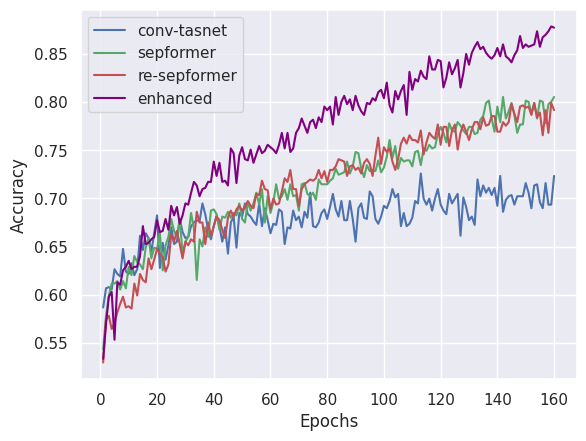

In [ ]:
sns.set()
conv_history = cleaned_m.history
cl_acc_values = conv_history['accuracy']
sb1_history = cleaned_sb1.history
d9_acc_values = sb1_history['accuracy'] 
sb2_history = cleaned_sb2.history
d12_acc_values = sb2_history['accuracy']
enhance_history = enhance_model.history
d15_acc_values = np.array(enhance_history['accuracy'])
epochs = range(1, len(d9_acc_values)+1)
plt.plot(epochs, cl_acc_values, 'b', label='conv-tasnet')
plt.plot(epochs, d9_acc_values, 'g', label='sepformer')
plt.plot(epochs, d12_acc_values, 'r', label='re-sepformer')
plt.plot(epochs, d15_acc_values, 'purple', label='enhanced')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

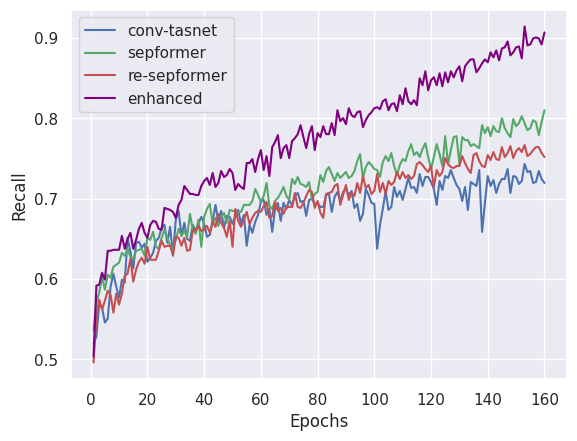

In [ ]:
sns.set()
conv_history = cleaned_m.history
cl_acc_values = conv_history['recall_1']
sb1_history = cleaned_sb1.history
d9_acc_values = sb1_history['recall_2'] 
sb2_history = cleaned_sb2.history
d12_acc_values = sb2_history['recall_3']
enhance_history = enhance_model.history
d15_acc_values = np.array(enhance_history['recall'])
epochs = range(1, len(d9_acc_values)+1)
plt.plot(epochs, cl_acc_values, 'b', label='conv-tasnet')
plt.plot(epochs, d9_acc_values, 'g', label='sepformer')
plt.plot(epochs, d12_acc_values, 'r', label='re-sepformer')
plt.plot(epochs, d15_acc_values, 'purple', label='enhanced')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()